In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Running code

In [431]:
# set up basic parameters
size_x=1000
size_y=1000
n_genes=30
n_cells=1000
cohabiting=False

In [407]:
a = scv.datasets.simulation(n_obs=n_cells,n_vars=n_genes) 
a.obs['kind']='trajectory'

## We introduce spatial artifacts in here

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


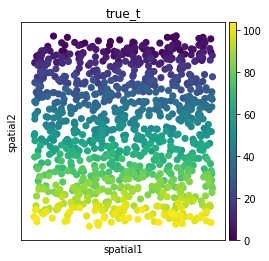

In [408]:
a=simulate_space(a,how='spatial_gradient',spread=50,size_x=size_x,size_y=size_y)
a=simulate_missegmentation(a)
#a=simulate_cytoplasmic_leakage(a,max_cytoplasmic_leakage=0.1)
#a=simulate_boundary_underestimation(a)
# simulate cohabiting_population
if cohabiting==True:
    a2=simulate_cohabiting_population(a,n_cells_ct2=500,size_x=size_x,size_y=size_y/2)
    a2=simulate_missegmentation(a2,max_missegmentation_proportion=0.3,max_distance_misseg=10)
    a2=simulate_cytoplasmic_leakage(a2,max_cytoplasmic_leakage=0.01)
    #a2=simulate_boundary_underestimation(a2)
    a=sc.concat([a,a2])
    a=simulate_missegmentation(a,max_missegmentation_proportion=0.1,max_distance_misseg=2)
sc.pl.spatial(a,color='true_t',spot_size=40)

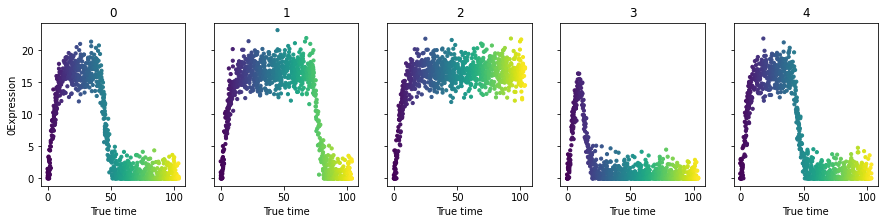

In [444]:
plot_expression_vs_true_time(a,genes=a.var.index[0:5],color='true_t',spotsize=10)

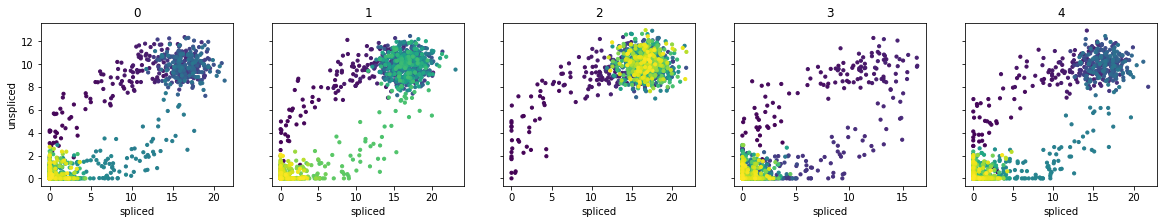

In [436]:
plot_unspliced_vs_spliced(a,genes=a.var.index[0:5],color='true_t',spotsize=10)

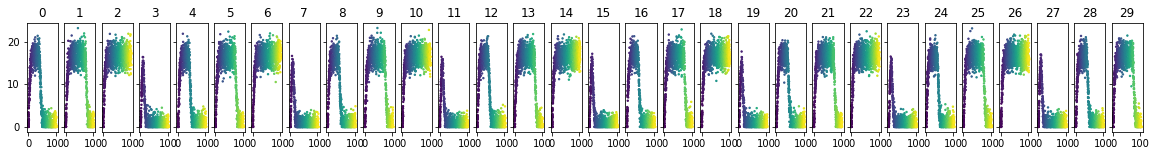

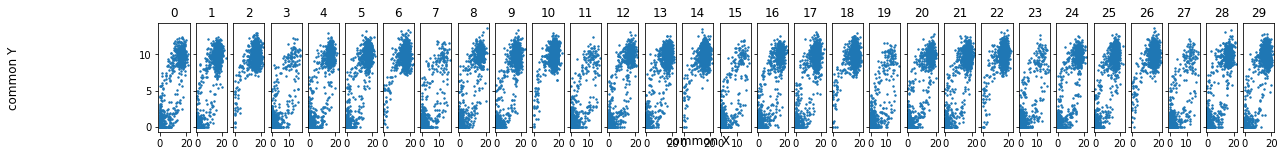

In [415]:

plot_unspliced_vs_spliced(a,)

In [446]:
a
# pca, neighbours, umap, leiden
sc.pp.pca(a)
sc.pp.neighbors(a, n_neighbors = 10, n_pcs=0)
sc.tl.umap(a,min_dist=1)
sc.tl.leiden(a,resolution = 0.1 )

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


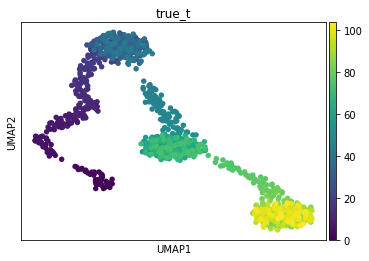

Plotting not possible


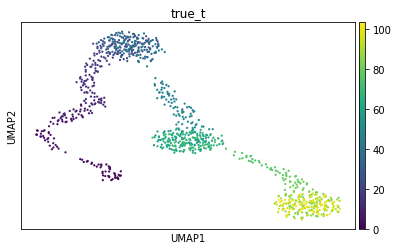

In [447]:
a.obs['missegmented_cell']=a.obs['missegmented_cell'].astype('boolean')*1
a.obs['total_counts']=np.sum(a.X,axis=1)
sc.pl.umap(a,color='true_t')
try:
    sc.pl.umap(a,color=['true_t','boundary_underestimation','total_counts','missegmented_cell','mean_leakage'],s=20,ncols=2)
except:
    print('Plotting not possible')

In [448]:
mode_selected='dynamical'
scv.pp.neighbors(a)
scv.pp.moments(a, n_pcs=None, n_neighbors=None)
scv.tl.velocity(a, mode=mode_selected)
scv.tl.velocity_graph(a)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


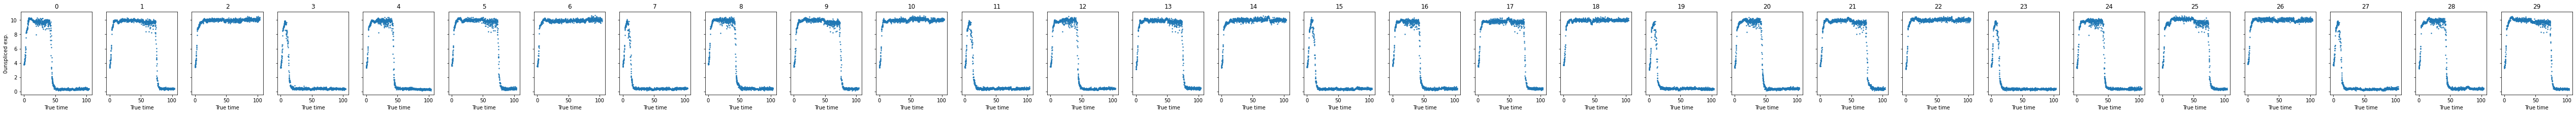

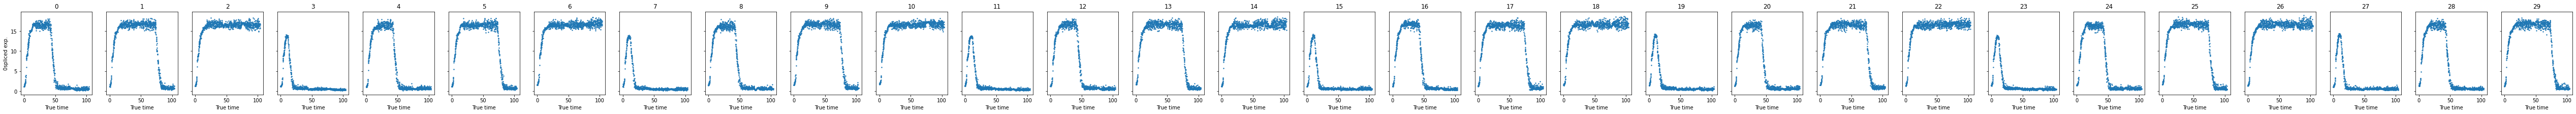

In [456]:
plot_Munspliced_ans_Mspliced_vs_true_t(a)

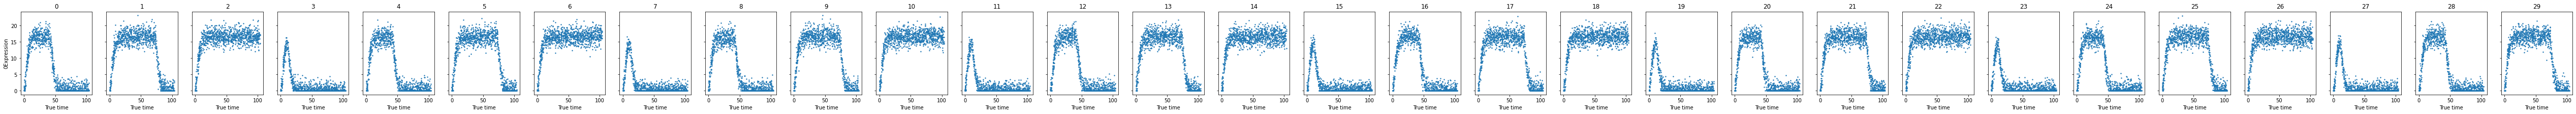

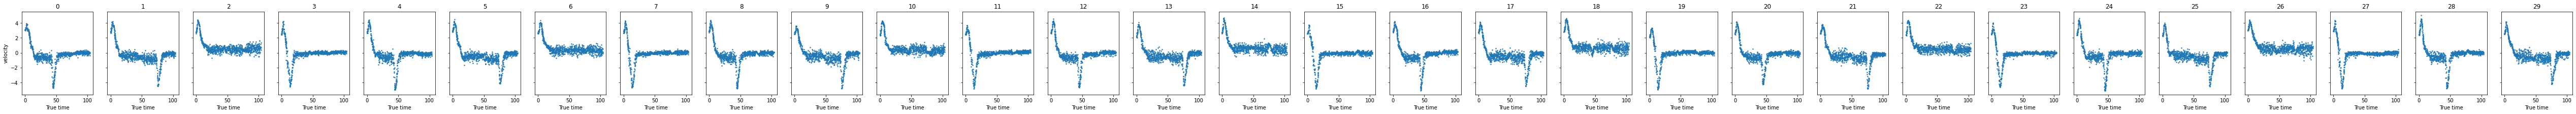

In [451]:
plot_expression_vs_true_time(a)
plot_velocity_vs_true_t(a)

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


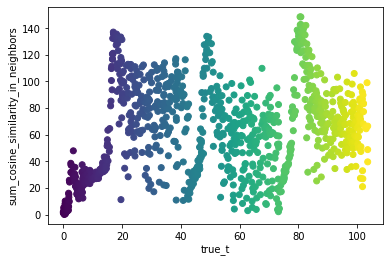

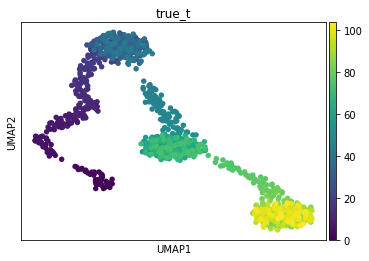

In [257]:
velocity_graph=a.uns['velocity_graph'].todense()
sum_cosine_similarity=pd.DataFrame(velocity_graph.sum(axis=1).transpose()[0,:]).iloc[0,:]
plt.scatter(a.obs['true_t'],sum_cosine_similarity,c=a.obs['true_t'])
plt.ylabel('sum_cosine_similarity_in_neighbors')
plt.xlabel('true_t')
sc.pl.umap(a,color='true_t')

<Axes: >

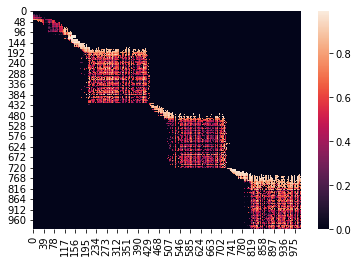

In [258]:
import seaborn as sns
sns.heatmap(velocity_graph)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


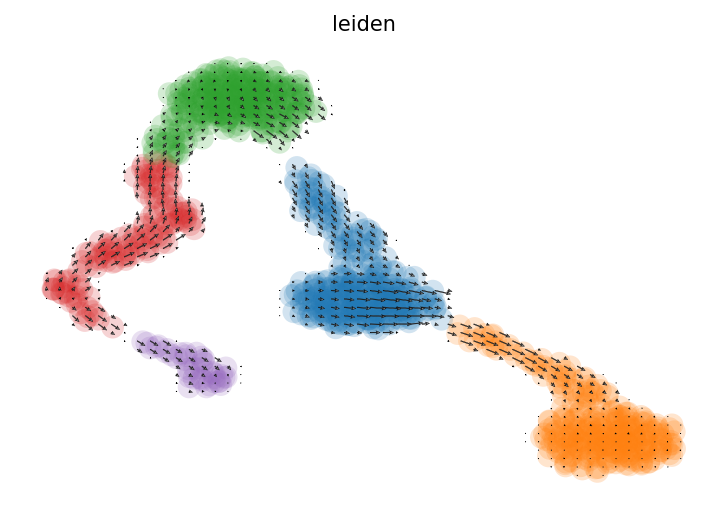

In [259]:
scv.pl.velocity_embedding_grid(a, basis='umap', color='leiden',legend_loc='none',dpi=150)

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


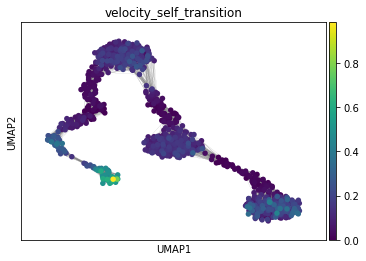

In [260]:
sc.pl.umap(a, color='velocity_self_transition',edges=True)

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


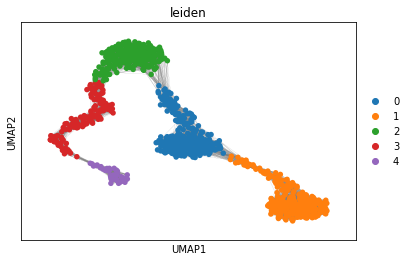

In [261]:
sc.pl.umap(a, color='leiden',edges=True)

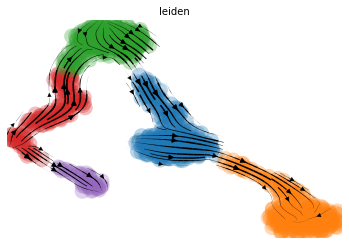

In [262]:
scv.pl.velocity_embedding_stream(a, basis='umap', color='leiden',legend_loc='none')

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


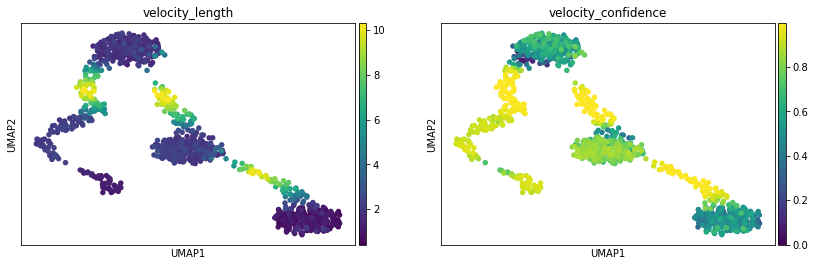

In [263]:
scv.tl.velocity_confidence(a)
keys = 'velocity_length', 'velocity_confidence'
sc.pl.umap(a,color=keys)

In [269]:
scv.tl.recover_dynamics(a)

recovering dynamics (using 1/32 cores)


  0%|          | 0/23 [00:00<?, ?gene/s]

    finished (0:00:04) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


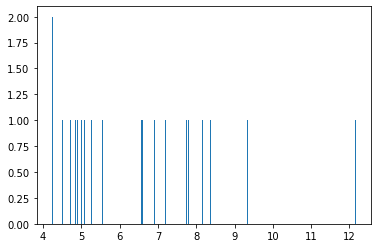

In [270]:
s=plt.hist(a.var['fit_alpha'],bins=400)

# Work with a static population

In [396]:
# set up basic parameters
size_x=1000
size_y=1000
n_genes=30
n_cells=5000
cohabiting=False

In [397]:
a=simulate_static_population(n_transcripts=n_genes,n_cells=1200,size_x=500,size_y=500)

In [398]:
a=simulate_missegmentation(a,max_missegmentation_proportion=0.6,max_distance_misseg=20)
#a=simulate_cytoplasmic_leakage(a,max_cytoplasmic_leakage=0.5)
#a=simulate_boundary_underestimation(a)

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


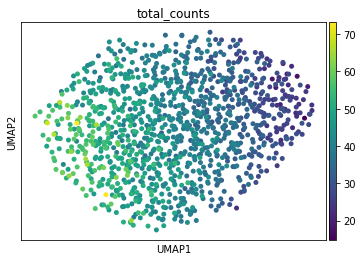

In [399]:
a
# pca, neighbours, umap, leiden
sc.pp.pca(a)
sc.pp.neighbors(a, n_neighbors = 10, n_pcs=0)
sc.tl.umap(a,min_dist=1)
sc.tl.leiden(a,resolution = 0.1 )
a.obs['total_counts']=np.sum(a.X,axis=1)
sc.pl.umap(a,color='total_counts')

In [400]:
mode_selected='dynamical'
scv.pp.neighbors(a)
scv.pp.moments(a, n_pcs=None, n_neighbors=None)
scv.tl.velocity(a, mode=mode_selected)
scv.tl.velocity_graph(a)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
Normalized count data: unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/1200 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


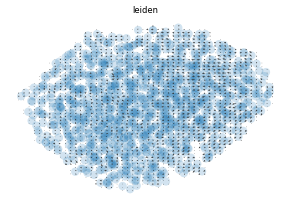

In [401]:
scv.pl.velocity_embedding_grid(a, basis='umap', color='leiden',legend_loc='none',dpi=60)

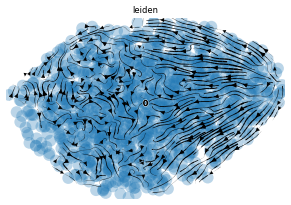

In [402]:
scv.pl.velocity_embedding_stream(a, basis='umap', color='leiden',dpi=60)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


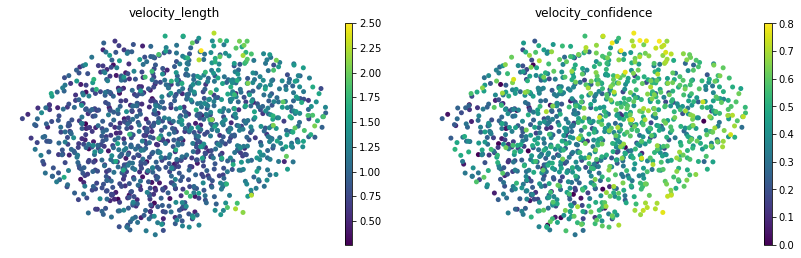

In [403]:
scv.tl.velocity_confidence(a)
keys = 'velocity_length', 'velocity_confidence'
sc.pl.umap(a,color=keys,frameon=False)

# Metrics to evaluate performance of RNA velocity

AnnData object with n_obs × n_vars = 1200 × 30
    obs: 'index', 'true_t', 'x', 'y', 'kind', 'missegmented_cell', 'leiden', 'total_counts', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'